<a href="https://colab.research.google.com/github/Savannah-Stuart10/fungal-temp-analysis/blob/main/Fungi_Work_Working_File_While_Travelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.mdpi.com/2306-5729/10/4/42
# This is a paper that has done a similar review to ours in terms of looking at temperatures of known species.
# "This paper describes this dataset in the hope that other researchers can bring their own analytical methods to bear on the question of what limits
#eukaryotic growth temperature, for basic and applied goals."

In [2]:
#the author from that paper: Dr. William Bains from the School of Physics & Astronomy, Cardiff University

In [3]:
#Dr. Bains got a lot of his reference data from https://datadryad.org/dataset/doi:10.5061/dryad.tqjq2bvw6

In [6]:
#The data comes in a zipfile. like the last code, this needs to be an extracted zipfile.
import zipfile
import os

# Specify the path to the zip file
zip_file_path = '/content/data-10-00042-s001.zip'

# Specify the directory where it should be extracted into
extract_dir = 'extracted_data'
# Create the extraction directory
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"'{zip_file_path}' unzipped to '{extract_dir}' successfully.")

'/content/data-10-00042-s001.zip' unzipped to 'extracted_data' successfully.


In [7]:
#Excel saved this file as a .xlsm and I need to make sure the computer knows this. The last file we worked with was a .csv. .xlsm tells the code it is an excel file.
import os

extracted_files = os.listdir(extract_dir)
print(f"Files extracted to '{extract_dir}':\n{extracted_files}")

Files extracted to 'extracted_data':
['data-3496761-supplementary.xlsm']


In [8]:
import pandas as pd

file_path = os.path.join(extract_dir, extracted_files[0])
df = pd.read_excel(file_path)

print("Data loaded successfully into a DataFrame. Displaying the first 5 rows:")
print(df.head())

Data loaded successfully into a DataFrame. Displaying the first 5 rows:
   Unnamed: 0                                         Unnamed: 1 Unnamed: 2  \
0         NaN                                                NaN        NaN   
1         NaN           Fungal growth temperature limits dataset        NaN   
2         NaN       (c) William Bains 2025. All rights reserved.        NaN   
3         NaN  Dataset made available for non-commercial use ...        NaN   
4         NaN                                                NaN        NaN   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  
0        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN  
4        NaN        NaN        NaN        NaN  


In [9]:
#the first few rows of the dataframe is not data I want. I need to see where the data begins by checking all of the column names for the headers of the data.

print("DataFrame Info:")
df.info()

print("DataFrame Description:")
print(df.describe(include='all'))

print("First 20 rows of the DataFrame:")
print(df.head(20))

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Unnamed: 1  11 non-null     object 
 2   Unnamed: 2  8 non-null      object 
 3   Unnamed: 3  19 non-null     object 
 4   Unnamed: 4  33 non-null     object 
 5   Unnamed: 5  25 non-null     object 
 6   Unnamed: 6  25 non-null     object 
dtypes: float64(1), object(6)
memory usage: 4.1+ KB
DataFrame Description:
        Unnamed: 0                                Unnamed: 1   Unnamed: 2  \
count          0.0                                        11            8   
unique         NaN                                        11            8   
top            NaN  Fungal growth temperature limits dataset  This screen   
freq           NaN                                         1            1   
mean           NaN                                   

In [10]:
#Because there are multiple sheets in the excel file, I need to make sure that I take the Genomes and temp DB files because this is what we need to continue.
xl = pd.ExcelFile(file_path)
sheet_names = xl.sheet_names
print(f"Sheet names in the Excel file: {sheet_names}")

Sheet names in the Excel file: ['Read Me', 'Genomes and temp DB', 'Temperature of growth model', 'References', 'Togashi complete']


In [11]:
#Put the data from Genomes and temp DB into its own dataframe and visualize it.

df_data = pd.read_excel(file_path, sheet_name='Genomes and temp DB')
print("Data from 'Genomes and temp DB' sheet loaded successfully. Displaying the first 5 rows:")
print(df_data.head())

Data from 'Genomes and temp DB' sheet loaded successfully. Displaying the first 5 rows:
                  Unnamed: 0      Unnamed: 1     Unnamed: 2     Unnamed: 3  \
0                        NaN             NaN            NaN            NaN   
1                        NaN             NaN            NaN            NaN   
2                    SPECIES             NaN            NaN        GENOMES   
3     Name from Fungal Names     Source name  Other name(s)  Genome length   
4  Absidia glauca Hagem 1908  Absidia glauca            NaN           48.7   

       Unnamed: 4  Unnamed: 5 Unnamed: 6            Unnamed: 7  \
0             NaN         NaN        NaN                   NaN   
1             NaN         NaN        NaN                   NaN   
2             NaN         NaN        NaN             PROTEOMES   
3  Protein number  GC content  Reference  Proteome file source   
4           14891        44.5        NaN               Uniprot   

           Unnamed: 8                   Unname

In [12]:
#There are still a lot of multi-index columns and we need to inspect them to clear out unnecessary columns.
# The index looks like it starts at row 4, so I am going to use the .iloc[index#] function to LOCATE and retain the data from the rows following it.

df_firstclean = pd.read_excel(file_path, sheet_name='Genomes and temp DB', header=3)

print("First DataFrame Cleaning:")
display(df_firstclean.columns.tolist())
#to list should show the list of columns so we can see if it has recognized the columns applicable inside if the dataset

First DataFrame Cleaning:


['SPECIES',
 'Unnamed: 1',
 'Unnamed: 2',
 'GENOMES',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'PROTEOMES',
 'Unnamed: 8',
 'Unnamed: 9',
 'TEMPERATURE RANGE',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'TOGASHI TEMPERATURE RANGE',
 'Unnamed: 15',
 'Unnamed: 16',
 'COMBINED TEMPERATURES',
 'Unnamed: 18',
 'TAXONOMY',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27']

In [13]:
#to set the appropriate headers for the data we actually need and drop the other data, this is where we will use .iloc[2] and iloc[3:].
#the second .iloc[3:] demonstrates the columns we want to keep in this. using .copy() allows us to copy the dataframe to qualify the next cleaned df.
proper_columns = df_data.iloc[2]
df_cleaned = df_data.iloc[3:].copy()
df_cleaned.columns = proper_columns

#set the columns we want to keep
selected_columns = ['SPECIES', 'GENOMES', 'PROTEOMES', 'TEMPERATURE RANGE', 'TAXONOMY', 'COMBINED TEMPERATURES']
df_1 = df_cleaned[selected_columns]

#see the first 5 of the new df
print("First clean and selected DataFrame:")
print(df_1.head())

First clean and selected DataFrame:
2                                            SPECIES        GENOMES  \
3                             Name from Fungal Names  Genome length   
4                          Absidia glauca Hagem 1908           48.7   
5  Actinomortierella wolfii (B.S. Mehrotra & Baij...         36.602   
6         Agaricus bisporus (J.E. Lange) Imbach 1946          30.42   
7              Agaricus bitorquis (Quél.) Sacc. 1887           32.3   

2             PROTEOMES TEMPERATURE RANGE  \
3  Proteome file source               Min   
4               Uniprot                 4   
5                  NCBI                14   
6               Uniprot               7.5   
7                   NaN                15   

2                                           TAXONOMY COMBINED TEMPERATURES  
3                                  Complete taxonomy                   MIN  
4  cellular organisms; Eukaryota; Opisthokonta; F...                     4  
5  cellular organisms; Eukaryota; O

In [14]:
#Now, I want to remove any Nan values for organisms without a proteome file source.

df_1 = df_1.dropna(subset=['PROTEOMES'])

print("DataFrame with NaN values in 'PROTEOMES' removed:")
print(df_1.head())

DataFrame with NaN values in 'PROTEOMES' removed:
2                                             SPECIES        GENOMES  \
3                              Name from Fungal Names  Genome length   
4                           Absidia glauca Hagem 1908           48.7   
5   Actinomortierella wolfii (B.S. Mehrotra & Baij...         36.602   
6          Agaricus bisporus (J.E. Lange) Imbach 1946          30.42   
10  Akanthomyces lecanii (Zimm.) Spatafora, Kepler...         35.594   

2              PROTEOMES TEMPERATURE RANGE  \
3   Proteome file source               Min   
4                Uniprot                 4   
5                   NCBI                14   
6                Uniprot               7.5   
10               Uniprot                12   

2                                            TAXONOMY COMBINED TEMPERATURES  
3                                   Complete taxonomy                   MIN  
4   cellular organisms; Eukaryota; Opisthokonta; F...                     4  
5   ce

In [16]:
#I also want to remove any data that the taxonomy does not contain 'fungi' or 'eukaryote'

df_1 = df_1[df_1['TAXONOMY'].str.contains('Fungi|Eukaryota', case=False, na=False)]

print("Taxonomy has Fungi or Eukaryota:")
print(df_1.head())

Taxonomy has Fungi or Eukaryota:
2                                             SPECIES GENOMES PROTEOMES  \
4                           Absidia glauca Hagem 1908    48.7   Uniprot   
5   Actinomortierella wolfii (B.S. Mehrotra & Baij...  36.602      NCBI   
6          Agaricus bisporus (J.E. Lange) Imbach 1946   30.42   Uniprot   
10  Akanthomyces lecanii (Zimm.) Spatafora, Kepler...  35.594   Uniprot   
11  Albugo candida (Pers. ex J.F. Gmel.) Roussel 1806    45.3   Uniprot   

2  TEMPERATURE RANGE                                           TAXONOMY  \
4                  4  cellular organisms; Eukaryota; Opisthokonta; F...   
5                 14  cellular organisms; Eukaryota; Opisthokonta; F...   
6                7.5  cellular organisms; Eukaryota; Opisthokonta; F...   
10                12  cellular organisms; Eukaryota; Opisthokonta; F...   
11               NaN  cellular organisms; Eukaryota; Sar; Stramenopi...   

2  COMBINED TEMPERATURES  
4                      4  
5          

In [17]:
#I noticed that temperature range column had NaN values in it. This code gets rid of any species without known temperature ranges*
df_1 = df_1.dropna(subset=['TEMPERATURE RANGE'])

print(df_1.head())

2                                             SPECIES  GENOMES PROTEOMES  \
4                           Absidia glauca Hagem 1908     48.7   Uniprot   
5   Actinomortierella wolfii (B.S. Mehrotra & Baij...   36.602      NCBI   
6          Agaricus bisporus (J.E. Lange) Imbach 1946    30.42   Uniprot   
10  Akanthomyces lecanii (Zimm.) Spatafora, Kepler...   35.594   Uniprot   
12              Allomyces arbusculus E.J. Butler 1911  26.4828      NCBI   

2  TEMPERATURE RANGE                                           TAXONOMY  \
4                  4  cellular organisms; Eukaryota; Opisthokonta; F...   
5                 14  cellular organisms; Eukaryota; Opisthokonta; F...   
6                7.5  cellular organisms; Eukaryota; Opisthokonta; F...   
10                12  cellular organisms; Eukaryota; Opisthokonta; F...   
12                21  cellular organisms; Eukaryota; Opisthokonta; F...   

2  COMBINED TEMPERATURES  
4                      4  
5                     14  
6          

In [18]:
#To make sure there are no unknown temperatures in either column, I will drop NaN and 0 values in COMBINED TEMPERATURES just in case
df_1 = df_1.dropna(subset=['COMBINED TEMPERATURES'])
df_1 = df_1[df_1['COMBINED TEMPERATURES'] != 0]

print(df_1.head())

2                                             SPECIES  GENOMES PROTEOMES  \
4                           Absidia glauca Hagem 1908     48.7   Uniprot   
5   Actinomortierella wolfii (B.S. Mehrotra & Baij...   36.602      NCBI   
6          Agaricus bisporus (J.E. Lange) Imbach 1946    30.42   Uniprot   
10  Akanthomyces lecanii (Zimm.) Spatafora, Kepler...   35.594   Uniprot   
12              Allomyces arbusculus E.J. Butler 1911  26.4828      NCBI   

2  TEMPERATURE RANGE                                           TAXONOMY  \
4                  4  cellular organisms; Eukaryota; Opisthokonta; F...   
5                 14  cellular organisms; Eukaryota; Opisthokonta; F...   
6                7.5  cellular organisms; Eukaryota; Opisthokonta; F...   
10                12  cellular organisms; Eukaryota; Opisthokonta; F...   
12                21  cellular organisms; Eukaryota; Opisthokonta; F...   

2  COMBINED TEMPERATURES  
4                      4  
5                     14  
6          

In [19]:
#I need to make sure there are no duplicate species inside of SPECIES. This code block is to see if there are duplicates inside of species
duplicate_species = df_1[df_1.duplicated(subset='SPECIES', keep=False)]

print("Duplicate Species:")
print(duplicate_species)

Duplicate Species:
2                                              SPECIES GENOMES PROTEOMES  \
323  Hymenopellis radicata (Relhan) R.H. Petersen 2010    68.9      NCBI   
464  Hymenopellis radicata (Relhan) R.H. Petersen 2010    78.6      NCBI   

2   TEMPERATURE RANGE                                           TAXONOMY  \
323                 7  cellular organisms; Eukaryota; Opisthokonta; F...   
464                 8  cellular organisms; Eukaryota; Opisthokonta; F...   

2   COMBINED TEMPERATURES  
323                     7  
464                     8  


In [21]:
#This block will drop the species that exists at the index 323
df_1 = df_1.drop(323)

print(df_1.head())

2                                             SPECIES  GENOMES PROTEOMES  \
4                           Absidia glauca Hagem 1908     48.7   Uniprot   
5   Actinomortierella wolfii (B.S. Mehrotra & Baij...   36.602      NCBI   
6          Agaricus bisporus (J.E. Lange) Imbach 1946    30.42   Uniprot   
10  Akanthomyces lecanii (Zimm.) Spatafora, Kepler...   35.594   Uniprot   
12              Allomyces arbusculus E.J. Butler 1911  26.4828      NCBI   

2  TEMPERATURE RANGE                                           TAXONOMY  \
4                  4  cellular organisms; Eukaryota; Opisthokonta; F...   
5                 14  cellular organisms; Eukaryota; Opisthokonta; F...   
6                7.5  cellular organisms; Eukaryota; Opisthokonta; F...   
10                12  cellular organisms; Eukaryota; Opisthokonta; F...   
12                21  cellular organisms; Eukaryota; Opisthokonta; F...   

2  COMBINED TEMPERATURES  
4                      4  
5                     14  
6          

In [23]:
#I want to know how many species are left after the data filtering I have currently performed.
print(f"Number of species after current filtering: {len(df_1)}")

Number of species after current filtering: 397


In [24]:
#Making sure that all species have a genome length. Removing any NaNs from there as well
df_1 = df_1.dropna(subset=['GENOMES'])

print(df_1.head())
print(f"Number of species after current filtering: {len(df_1)}")

2                                             SPECIES  GENOMES PROTEOMES  \
4                           Absidia glauca Hagem 1908     48.7   Uniprot   
5   Actinomortierella wolfii (B.S. Mehrotra & Baij...   36.602      NCBI   
6          Agaricus bisporus (J.E. Lange) Imbach 1946    30.42   Uniprot   
10  Akanthomyces lecanii (Zimm.) Spatafora, Kepler...   35.594   Uniprot   
12              Allomyces arbusculus E.J. Butler 1911  26.4828      NCBI   

2  TEMPERATURE RANGE                                           TAXONOMY  \
4                  4  cellular organisms; Eukaryota; Opisthokonta; F...   
5                 14  cellular organisms; Eukaryota; Opisthokonta; F...   
6                7.5  cellular organisms; Eukaryota; Opisthokonta; F...   
10                12  cellular organisms; Eukaryota; Opisthokonta; F...   
12                21  cellular organisms; Eukaryota; Opisthokonta; F...   

2  COMBINED TEMPERATURES  
4                      4  
5                     14  
6          

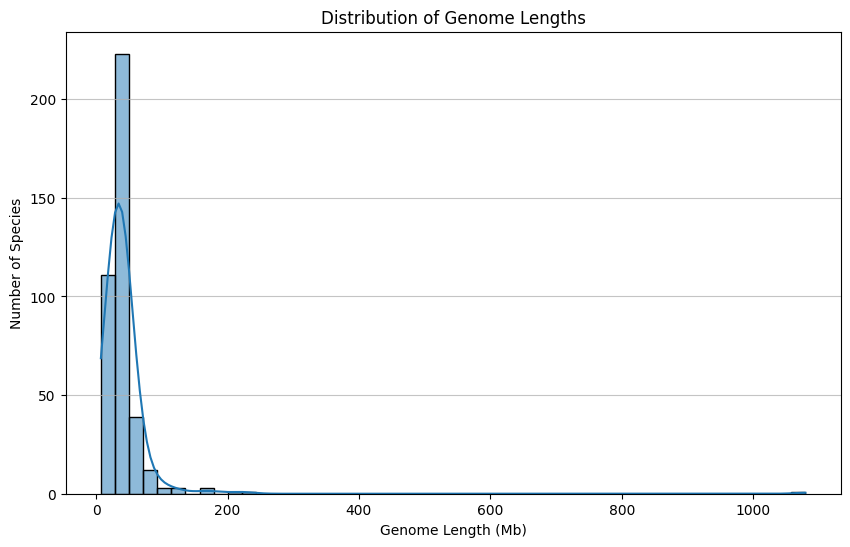

Minimum Genome Length: 7.26 Mb
Maximum Genome Length: 1079.52 Mb
Average Genome Length: 41.24 Mb


In [28]:
#Visualizing a genome length range inside GENOMES to see if any species genomes are really short
#To do this, I will use a graph to give me the range and the average range the values fit into.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_1['GENOMES'], bins=50, kde=True)
plt.title('Distribution of Genome Lengths')
plt.xlabel('Genome Length (Mb)')
plt.ylabel('Number of Species')
plt.grid(axis='y', alpha=0.75)
plt.show()

print(f"Minimum Genome Length: {df_1['GENOMES'].min():.2f} Mb")
print(f"Maximum Genome Length: {df_1['GENOMES'].max():.2f} Mb")
print(f"Average Genome Length: {df_1['GENOMES'].mean():.2f} Mb")

In [32]:
#identify the species in df_1 with a genome length of 1079 and see what other values it has
max_genome_length = df_1['GENOMES'].max()
species_with_max_genome = df_1[df_1['GENOMES'] == max_genome_length]

print(f"Species with the maximum Genome Length ({max_genome_length:.2f} Mb):")
print(species_with_max_genome)

Species with the maximum Genome Length (1079.52 Mb):
2                                      SPECIES     GENOMES PROTEOMES  \
501  Phakopsora pachyrhizi Syd. & P. Syd. 1914  1079.52125      NCBI   

2   TEMPERATURE RANGE                                           TAXONOMY  \
501                17  cellular organisms; Eukaryota; Opisthokonta; F...   

2   COMBINED TEMPERATURES  
501                    17  
